In [30]:
import pandas as pd
import numpy as np
from PIL import Image
import os
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [18]:
def load_and_process_image(image_path):
    img = Image.open(image_path)
    img = img.convert('L')  # Convert image to grayscale
    img = img.resize((128, 128))
    img_array = np.array(img, dtype=np.float32) / 255.0 
    return img_array

In [19]:
data = pd.read_csv('./train.csv')
data


,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE
...,...,...
19901,2482.jpg,MIDDLE
19902,20085.jpg,YOUNG
19903,19663.jpg,MIDDLE
19904,10132.jpg,MIDDLE


In [20]:
image_folder = './Train/'
images = [load_and_process_image(os.path.join(image_folder, filename)) for filename in data['ID'][:20000]]



In [40]:
imageMe=[load_and_process_image("./gf-sAW7-Aduz-t1Zh_betty-pettit-664x442.png")]
imageMe

[array([[0.21568628, 0.21568628, 0.21960784, ..., 0.21568628, 0.21568628,
         0.21568628],
        [0.21176471, 0.21568628, 0.21568628, ..., 0.21568628, 0.21568628,
         0.21568628],
        [0.21176471, 0.21568628, 0.21568628, ..., 0.21568628, 0.21568628,
         0.21568628],
        ...,
        [0.08627451, 0.08627451, 0.08235294, ..., 0.08627451, 0.09019608,
         0.09019608],
        [0.08627451, 0.08627451, 0.08235294, ..., 0.08627451, 0.09019608,
         0.09019608],
        [0.09019608, 0.08627451, 0.08627451, ..., 0.08627451, 0.08627451,
         0.09019608]], dtype=float32)]

In [22]:
images[2]

array([[0.16078432, 0.16078432, 0.16078432, ..., 0.9019608 , 0.9098039 ,
        0.90588236],
       [0.15686275, 0.15686275, 0.15686275, ..., 0.9490196 , 0.95686275,
        0.9529412 ],
       [0.15294118, 0.15294118, 0.15294118, ..., 0.9607843 , 0.9607843 ,
        0.9607843 ],
       ...,
       [0.1882353 , 0.1882353 , 0.1882353 , ..., 0.27450982, 0.27450982,
        0.27450982],
       [0.1882353 , 0.1882353 , 0.1882353 , ..., 0.26666668, 0.26666668,
        0.26666668],
       [0.1882353 , 0.1882353 , 0.1882353 , ..., 0.2627451 , 0.2627451 ,
        0.2627451 ]], dtype=float32)

In [59]:
encoder = LabelEncoder()
labels = encoder.fit_transform(data['Class'][:20000])

for i in range(0,100):
    print(labels[i])
    print(data['Class'][i])

0
MIDDLE
2
YOUNG
0
MIDDLE
2
YOUNG
0
MIDDLE
0
MIDDLE
2
YOUNG
2
YOUNG
2
YOUNG
1
OLD
2
YOUNG
0
MIDDLE
0
MIDDLE
0
MIDDLE
0
MIDDLE
0
MIDDLE
1
OLD
2
YOUNG
1
OLD
0
MIDDLE
2
YOUNG
1
OLD
2
YOUNG
0
MIDDLE
0
MIDDLE
2
YOUNG
0
MIDDLE
1
OLD
0
MIDDLE
2
YOUNG
2
YOUNG
2
YOUNG
0
MIDDLE
0
MIDDLE
0
MIDDLE
2
YOUNG
0
MIDDLE
0
MIDDLE
0
MIDDLE
2
YOUNG
0
MIDDLE
2
YOUNG
0
MIDDLE
0
MIDDLE
1
OLD
0
MIDDLE
2
YOUNG
0
MIDDLE
0
MIDDLE
2
YOUNG
0
MIDDLE
0
MIDDLE
0
MIDDLE
2
YOUNG
0
MIDDLE
0
MIDDLE
1
OLD
0
MIDDLE
1
OLD
0
MIDDLE
2
YOUNG
0
MIDDLE
2
YOUNG
2
YOUNG
0
MIDDLE
0
MIDDLE
1
OLD
2
YOUNG
2
YOUNG
2
YOUNG
2
YOUNG
0
MIDDLE
1
OLD
0
MIDDLE
0
MIDDLE
1
OLD
2
YOUNG
0
MIDDLE
0
MIDDLE
0
MIDDLE
0
MIDDLE
0
MIDDLE
0
MIDDLE
2
YOUNG
1
OLD
0
MIDDLE
2
YOUNG
0
MIDDLE
2
YOUNG
0
MIDDLE
0
MIDDLE
2
YOUNG
0
MIDDLE
2
YOUNG
2
YOUNG
2
YOUNG
0
MIDDLE
1
OLD
0
MIDDLE
2
YOUNG


In [24]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(128, 128, 1))) 
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(len(set(labels)), activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
weights,biases = model.layers[1].get_weights()

In [26]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics =["accuracy"])

In [27]:
images = np.array(images)
labels = np.array(labels)
correct_images= [load_and_process_image(os.path.join(image_folder, filename)) for filename in data['ID'][20000:25000]]
correct_images_np=np.array(correct_images)
correct_labels= encoder.fit_transform(data['Class'][20000:25000])
correct_labels_np=np.array(correct_labels)

model.fit(images,labels, epochs=80, validation_data=(correct_images_np,correct_labels_np))

Epoch 1/80
623/623 [==============================] - 10s 15ms/step - loss: 0.8857 - accuracy: 0.5787
Epoch 2/80
623/623 [==============================] - 10s 15ms/step - loss: 0.8435 - accuracy: 0.5995
Epoch 3/80
623/623 [==============================] - 10s 15ms/step - loss: 0.8262 - accuracy: 0.6095
Epoch 4/80
623/623 [==============================] - 10s 15ms/step - loss: 0.8144 - accuracy: 0.6161
Epoch 5/80
623/623 [==============================] - 10s 16ms/step - loss: 0.8055 - accuracy: 0.6250
Epoch 6/80
623/623 [==============================] - 10s 15ms/step - loss: 0.7947 - accuracy: 0.6316
Epoch 7/80
623/623 [==============================] - 10s 15ms/step - loss: 0.7888 - accuracy: 0.6348
Epoch 8/80
623/623 [==============================] - 10s 16ms/step - loss: 0.7796 - accuracy: 0.6399
Epoch 9/80
623/623 [==============================] - 10s 16ms/step - loss: 0.7744 - accuracy: 0.6412
Epoch 10/80
623/623 [==============================] - 10s 16ms/step - loss: 0.764

1/1 [==============================] - 0s 27ms/step
[1]


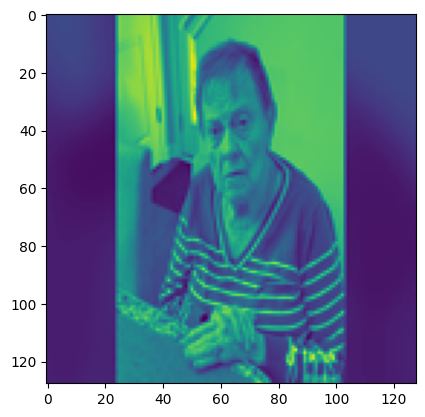

In [60]:
x_new=np.array(imageMe)
y_prob=model.predict(x_new)
y_pred_classes=np.argmax(y_prob,axis=1)
print(y_pred_classes)
plt.imshow(x_new[0])
